In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("npy/X.npy")
Y = np.load("npy/Y.npy")

In [3]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Define the base model (MobileNetV2)
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))

# Build the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

# Place the head on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# Freeze the base model layers
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

print("Model compiled successfully!")

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_50216\1337378793.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))


Model compiled successfully!


In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Mdoel training params
EPOCHS = 20
BS = 32

In [6]:
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=EPOCHS,
    batch_size=BS,
    callbacks=[early_stop]
)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.7574 - loss: 0.6689 - val_accuracy: 0.8496 - val_loss: 0.3402
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8436 - loss: 0.3515 - val_accuracy: 0.8588 - val_loss: 0.3220
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.8519 - loss: 0.3293 - val_accuracy: 0.8576 - val_loss: 0.3111
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8743 - loss: 0.2871 - val_accuracy: 0.8625 - val_loss: 0.3014
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.8817 - loss: 0.2816 - val_accuracy: 0.8649 - val_loss: 0.2980
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.8814 - loss: 0.2705 - val_accuracy: 0.8649 - val_loss: 0.2906
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.8937 - loss: 0.2572 - val_accuracy: 0.8680 - val_loss: 0.2865
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.8924 - loss: 0.24

In [9]:
# Save model
model.save("models/facemask_detector_model.keras")
print("Model trained and saved!")

Model trained and saved!


In [12]:
with open('models/history_facemask_detector_model', 'wb') as f:
    pickle.dump(history.history, f)

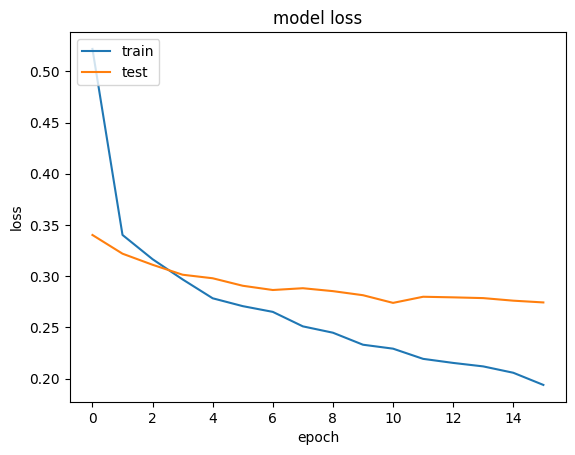

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()